In [1]:
import sys
import os
from pathlib import Path

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)

from LMORL.BAN.API.agents.LDQNStandard import LDQNStandard

import gym

env = gym.make("LunarLander-v2-mo", render_mode="rgb_array")

In [2]:
import torch

device = torch.device("cpu")#<--

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
hidden_size = 128
reward_size = 3 #<--
max_memory_size=10000
train_start = max_memory_size

#print(f"num_actions: {num_actions}")
#print(f"action_space: {action_space}")
#print(f"env.action_space: {env.action_space}")

agent = LDQNStandard(device=device, input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  reward_size=reward_size, max_memory_size=max_memory_size, train_start=train_start)


c:\Python310\lib\site-packages\gym\utils\passive_env_checker.py:252: UserWarning: WARN: The reward returned by `step()` must be a float, int, np.integer or np.floating, actual type: <class 'numpy.ndarray'>
  logger.warn(


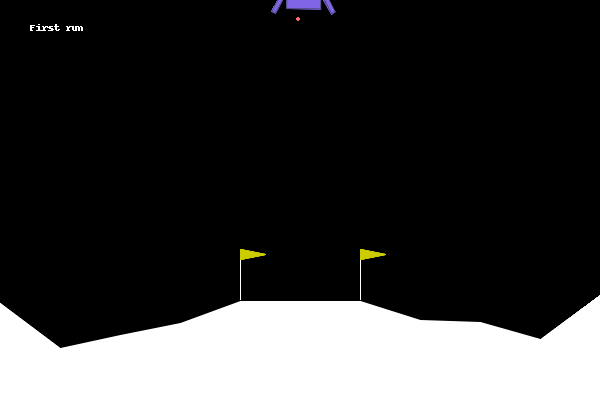

In [3]:
from IPython.display import Image as IpyImg

total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title="First run", render=False, verbose=False)

display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

11:10:16	Episode	1	timesteps:	115	Took	0.029023 sec - reward:	[162.7401647399706, -100.0, -8.999999999999998]	| 100AvgReward: [162.7401647399706, -100.0, -8.999999999999998]
11:10:16	Episode	2	timesteps:	64	Took	0.012977 sec - reward:	[-48.77715911137585, -100.0, -4.979999999999997]	| 100AvgReward: [56.98150281429737, -100.0, -6.9899999999999975]
11:10:16	Episode	3	timesteps:	88	Took	0.017045 sec - reward:	[-40.02727359968753, -100.0, -8.309999999999999]	| 100AvgReward: [24.645244009635736, -100.0, -7.429999999999997]
11:10:16	Episode	4	timesteps:	87	Took	0.016989 sec - reward:	[80.34280166342168, -100.0, -8.879999999999999]	| 100AvgReward: [38.56963342308222, -100.0, -7.792499999999998]
11:10:16	Episode	5	timesteps:	85	Took	0.017006 sec - reward:	[68.6779676595072, -100.0, -6.210000000000002]	| 100AvgReward: [44.59130027036722, -100.0, -7.475999999999999]
11:10:16	Episode	6	timesteps:	96	Took	0.019003 sec - reward:	[-182.4547185826205, -100.0, -10.17]	| 100AvgReward: [6.75029712820259

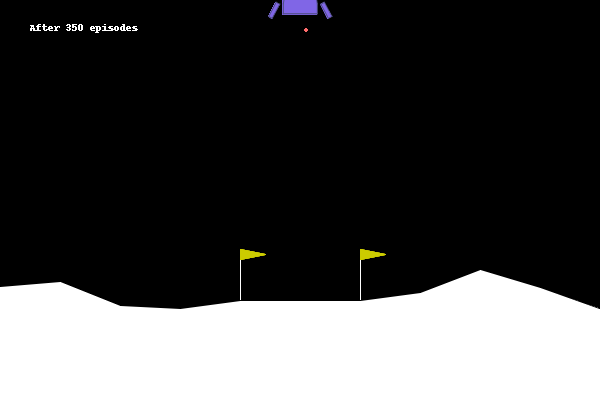

In [4]:
from IPython.display import Image as IpyImg

HOW_MANY_ITERATIONS = 1
EPISODES_PER_ITERATION = 350
REPLAY_FREQUENCY=4
mname = "fooo.model"

total_rewards = []
total_avg_rewards   = []
total_timings = []


for i in range(HOW_MANY_ITERATIONS):
    rewards, avg_rewards, timings, infos_lists = agent.learning(env=env,episodes=EPISODES_PER_ITERATION, replay_frequency=REPLAY_FREQUENCY, mname=mname, verbose=True)
    total_rewards += rewards
    total_avg_rewards += avg_rewards
    total_timings += timings
    title=f"After {(i+1)*EPISODES_PER_ITERATION} episodes"
    total_reward, num_timestep, elapsed_episode, animated_gif_file = agent.run_episode(env, title=title, render=False, verbose=False)
    display(IpyImg(data=animated_gif_file.getbuffer(), format='png'))

In [7]:
print(total_reward, num_timestep, elapsed_episode)

[182.88748955499904, 0.0, -102.03000000000026] 1000 5.213998


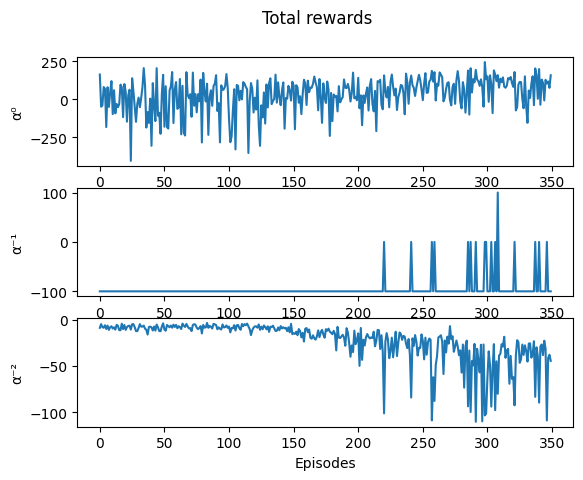

In [5]:
from LMORL.BAN.API.ban_utils import Ban

%matplotlib inline

r = Ban.display_plot(total_rewards, len(total_rewards), "Total rewards")

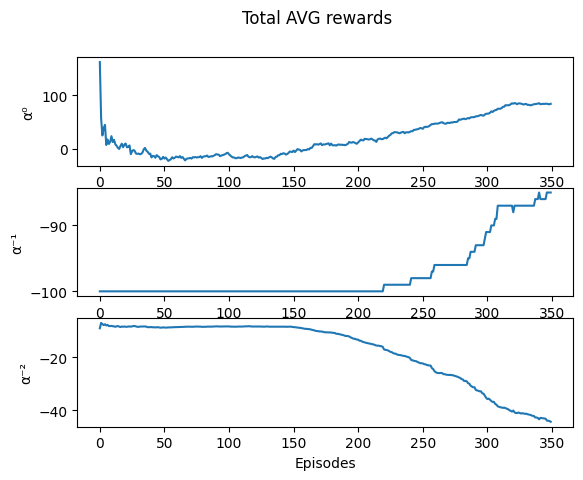

In [6]:
r = Ban.display_plot(total_avg_rewards, len(total_avg_rewards), "Total AVG rewards")